In [6]:


"""
https://blog.csdn.net/wehung/article/details/89215211

"""

import numpy as np
import matplotlib.pyplot as plt
m =200 
X =np.random.randn(2,m) #产生2*200 高斯分布 均值为0 方差为1 
Y = (X[0,:]>0)*(X[1,:]>0)*1.0 + (X[0,:]<0)*(X[1,:]<0)


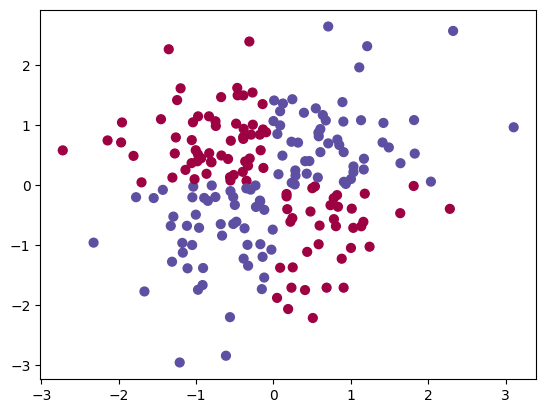

In [7]:
#可视化 jupyter notebook环境下
%matplotlib inline 
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap = plt.cm.Spectral) #**


2 搭建多层神经网络
2.1 导入库
import torch 
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import math
%matplotlib inline
1
2
3
4
5
6
2.2 读取数据集
Pima-Indians-Diabetes数据集，github可搜到

import pandas as pd
xy = pd.read_csv('diabetes.csv',delimiter=',',dtype= np.float32)
#print(xy.head())
xy_numpy = xy.to_numpy() #pandas 转维numpy 为了后面numpy转tensor
x = xy_numpy[:,0:-1] # x为 768*8
y = xy_numpy[:,-1].reshape(-1,1) #为了让其shape为 768*1 ，而不是768
————————————————
版权声明：本文为CSDN博主「夜猫子科黎」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/wehung/article/details/89215211

In [8]:

import torch 
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import math
%matplotlib inline

import pandas as pd
xy = pd.read_csv('diabetes.csv',delimiter=',',dtype= np.float32)
# print(xy.head())
xy_numpy = xy.to_numpy() #pandas 转维numpy 为了后面numpy转tensor
x = xy_numpy[:,0:-1] # x为 768*8
y = xy_numpy[:,-1].reshape(-1,1) #为了让其shape为 768*1 ，而不是768

In [9]:
x_data = torch.Tensor(torch.from_numpy(x)) #注意此处的Tensor 若由numpy转换过来 numpy的dtype须为np.float32或其他float类型
y_data = torch.Tensor(torch.from_numpy(y))
print(x_data.data.shape)
print(y_data.data.shape)


torch.Size([768, 8])
torch.Size([768, 1])


In [10]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        # 定义多层神经网络
        # 768 8 6 4 1
        self.fc1 = torch.nn.Linear(8,128)
        self.fc2 = torch.nn.Linear(128,4)
        self.fc3 = torch.nn.Linear(4,1)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))            # 8->6  第一层：
        x = F.dropout(x,p=0.5)             #dropout 1 
        x = F.relu(self.fc2(x))            #-6->4   第二层
        x = F.dropout(x,p=0.5)             # dropout 2
        y_pred = torch.sigmoid(self.fc3(x))         # 4->1 ->sigmoid  第三层+sigmoid层
        # warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead."
        return y_pred


In [11]:
def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear')!= -1:
        print("hi")
        m.weight.data = torch.randn(m.weight.data.size()[0],m.weight.data.size()[1])
        m.bias.data = torch.randn(m.bias.data.size()[0])
model = Model()
model.apply(weight_init)


criterion  = torch.nn.BCELoss() #定义损失函数 binary corsstropy
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01) #学习率设置为0.01,学习率为超参数 ，可以自己设置
Loss = []
print('x.shape',x.shape)


# 最大训练次数
max_tc = 2**13
for epoch in range(max_tc):
    y_pred = model(x_data)
    #计算误差
    loss = criterion(y_pred,y_data)
    #
    #prin(loss.item())
    Loss.append(loss.item())
    #每迭代1000次打印Lost并记录
    if epoch%(2**9) == 0:
        print('%.3f'% loss.item())
        print('[%d, %5d] loss: %.3f' %
                  (epoch, max_tc, loss.item()))
    #梯度清零
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #更新梯度
    optimizer.step()


hi
hi
hi
x.shape (768, 8)
29.217
[0,  8192] loss: 29.217
1.798
[512,  8192] loss: 1.798
0.919
[1024,  8192] loss: 0.919
0.777
[1536,  8192] loss: 0.777
0.904
[2048,  8192] loss: 0.904
0.903
[2560,  8192] loss: 0.903
0.775
[3072,  8192] loss: 0.775
0.645
[3584,  8192] loss: 0.645
0.776
[4096,  8192] loss: 0.776
0.794
[4608,  8192] loss: 0.794
0.646
[5120,  8192] loss: 0.646
0.700
[5632,  8192] loss: 0.700
0.647
[6144,  8192] loss: 0.647
0.647
[6656,  8192] loss: 0.647
0.647
[7168,  8192] loss: 0.647
0.647
[7680,  8192] loss: 0.647


In [12]:
for i in range(len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i] = 1.0
    else:
        y_pred[i] = 0.0
# print(y_pred)
type(y_pred)
(y_pred == y_data).sum().item()/len(y_data) # torch.Tensor.sum()函数


0.6510416666666666